# Random Forest

### Dataset Description:
Use the Glass dataset and apply the Random forest model.

###### 1: Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset. Check for missing values, outliers, inconsistencies in the data.

###### 2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features. Analyze any patterns or correlations observed in the data.

###### 3: Data Preprocessing

Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

###### 4: Random Forest Model Implementation

Divide the data into train and test split.
Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

###### 5: Bagging and Boosting Methods Apply the Bagging and Boosting methods and compare the results.

### Additional Notes:

Explain Bagging and Boosting methods. How is it different from each other.
Explain how to handle imbalance in the data.

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
df = pd.read_csv("glass.csv")

# Data Exploration

In [3]:
df.shape

(214, 10)

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.tail

<bound method NDFrame.tail of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>

In [6]:
df.sample()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
26,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.0,1


### Quick Data Check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

### Statistical Summary

In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
df.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [13]:
# There is one duplicate value in data set

### Identifying Missing Values

In [14]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [15]:
# There is no missing value in above data set

### Identifying Outliers

<Axes: >

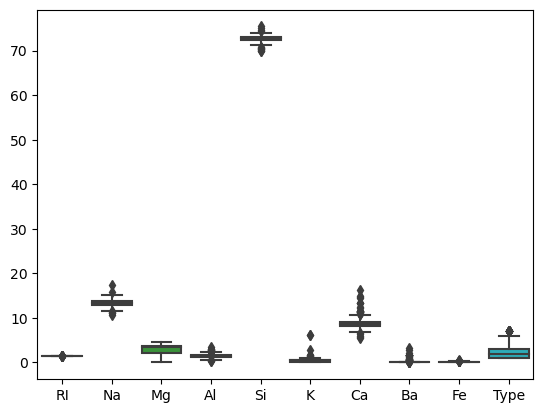

In [16]:
sns.boxplot(data=df)

### Data Visualization

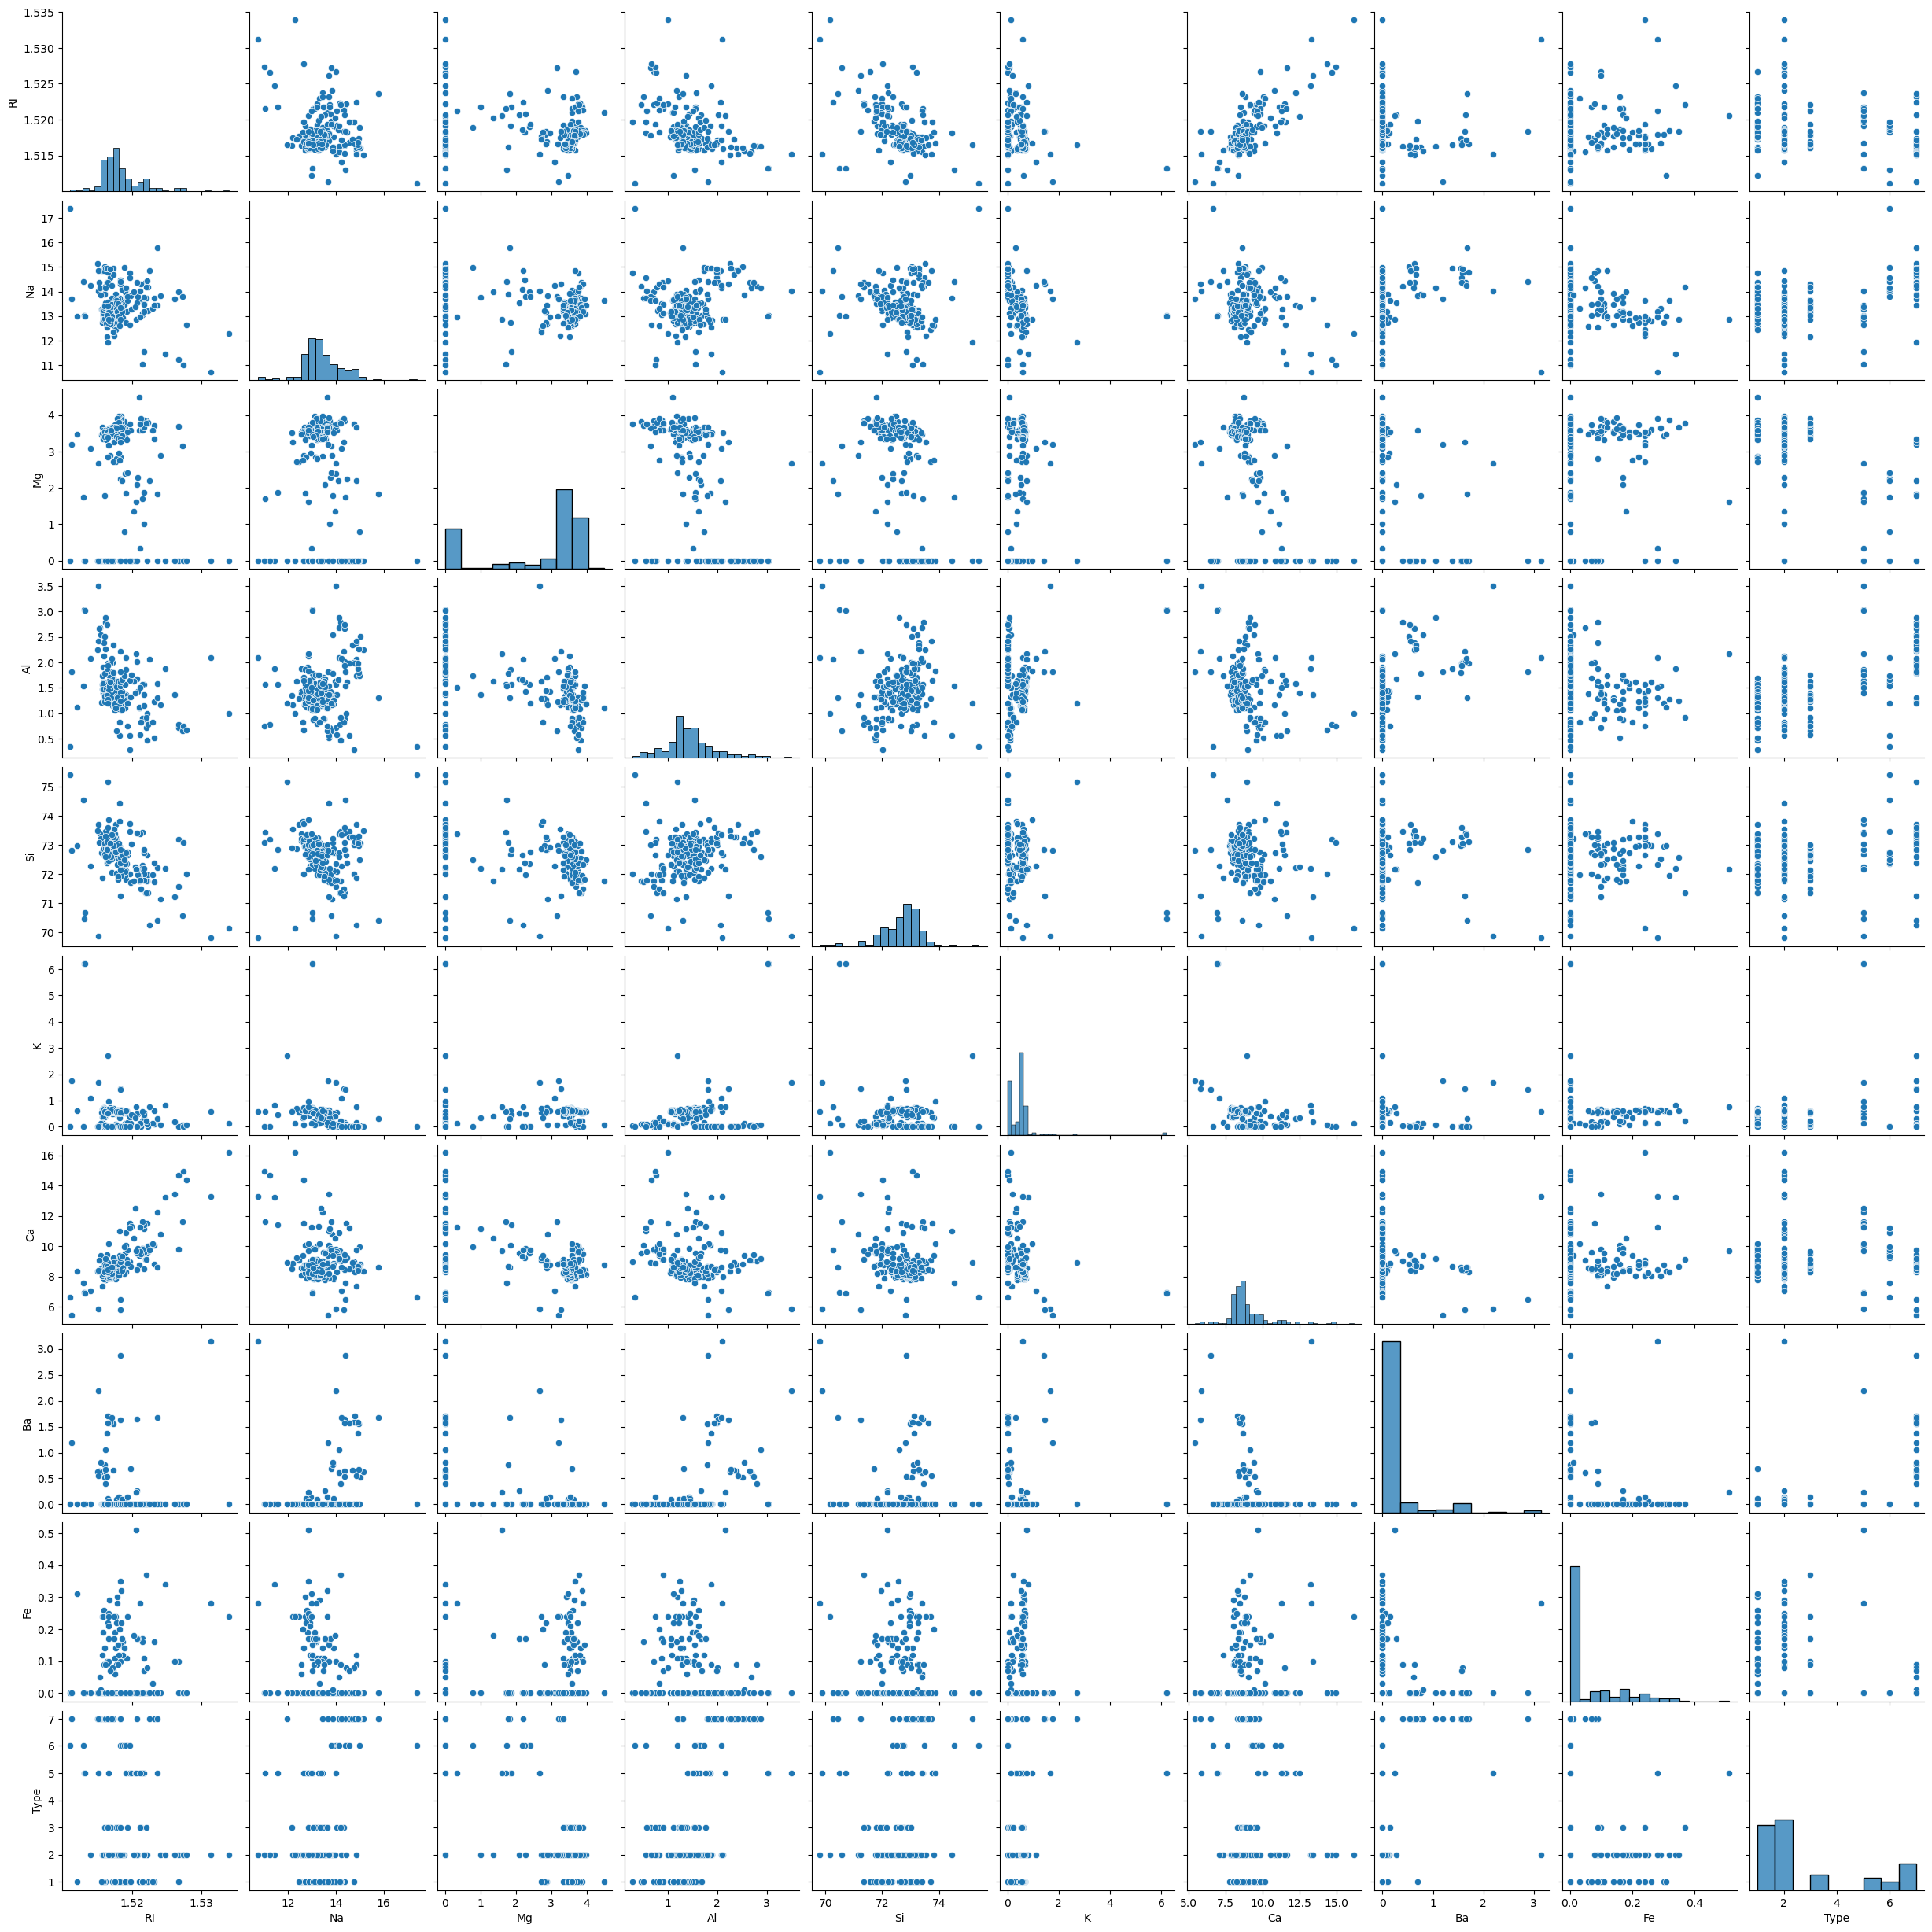

In [17]:
sns.pairplot(df)

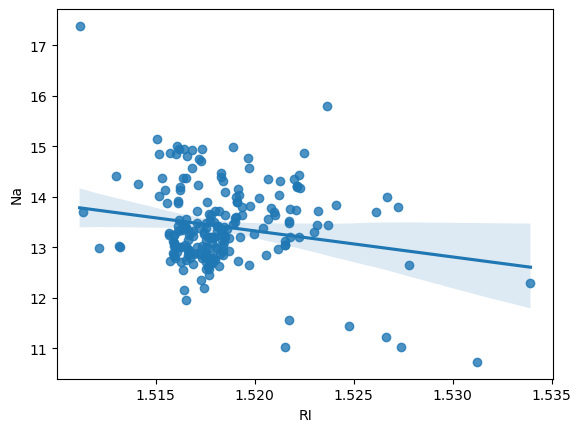

In [29]:
sns.regplot(data=df, x='RI',y='Na');

The scatter plot shows a Weak Negative correlation between Na and Rl.

<Axes: >

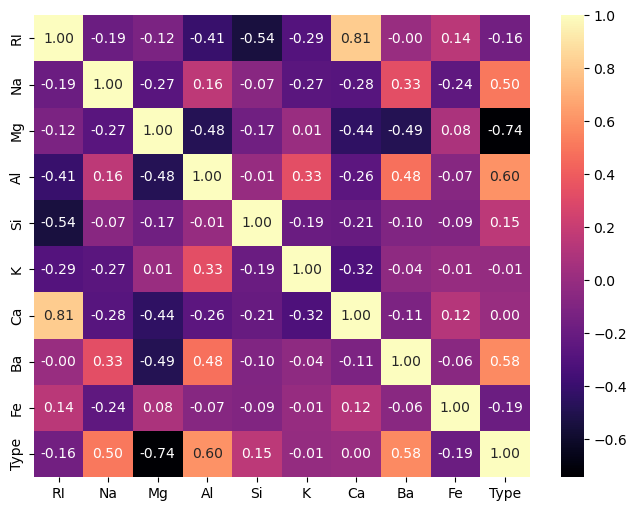

In [30]:
plt.figure(figsize = (8, 6));
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".2f")

In [33]:
import ppscore as pps
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,RI,RI,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,RI,Na,0.000000,regression,True,mean absolute error,0.591776,0.759046,DecisionTreeRegressor()
2,RI,Mg,0.000000,regression,True,mean absolute error,0.962757,1.145532,DecisionTreeRegressor()
3,RI,Al,0.069840,regression,True,mean absolute error,0.354065,0.329338,DecisionTreeRegressor()
4,RI,Si,0.000000,regression,True,mean absolute error,0.540374,0.560560,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
95,Type,K,0.000000,regression,True,mean absolute error,0.287523,0.307335,DecisionTreeRegressor()
96,Type,Ca,0.000000,regression,True,mean absolute error,0.848364,0.897050,DecisionTreeRegressor()
97,Type,Ba,0.224864,regression,True,mean absolute error,0.175047,0.135685,DecisionTreeRegressor()
98,Type,Fe,0.000000,regression,True,mean absolute error,0.057009,0.073993,DecisionTreeRegressor()


In [34]:
pps.score(df, "RI", "Na")

{'x': 'RI',
 'y': 'Na',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.5917757009345795,
 'model_score': 0.7590456848357792,
 'model': DecisionTreeRegressor()}

### Data Splitting

In [142]:
X = df.drop('Si',axis=1)
y = df['Si']

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (171, 9)
Shape of X_test:  (43, 9)
Shape of y_train:  (171,)
Shape of y_test: (43,)


### Model Selection - RandomForest Regressor

In [145]:
from sklearn.ensemble import RandomForestRegressor

In [146]:
rfr_model = RandomForestRegressor()

In [147]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [148]:
y_pred = rfr_model.predict(X_test)
y_pred

array([72.949 , 73.0954, 72.2777, 73.2446, 72.5364, 72.4318, 73.072 ,
       72.9403, 73.0501, 72.8392, 72.5852, 71.8567, 72.5124, 72.7001,
       73.0305, 72.9065, 73.2675, 72.0246, 72.1727, 73.9025, 73.1713,
       72.836 , 71.6102, 73.2219, 72.6729, 71.3766, 73.1835, 72.9729,
       72.5679, 73.0711, 73.1237, 73.0454, 72.5537, 72.8751, 71.934 ,
       73.1195, 71.8067, 73.2965, 73.3934, 72.6109, 73.1933, 73.4393,
       72.1209])

### Model Evaluation

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [150]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.3444441860465059
Mean Squared Error (MSE): 0.2748570416278988
Root Mean Squared Error (RMSE): 0.5242681009063004
R-squared (R2): 0.5238194258762199


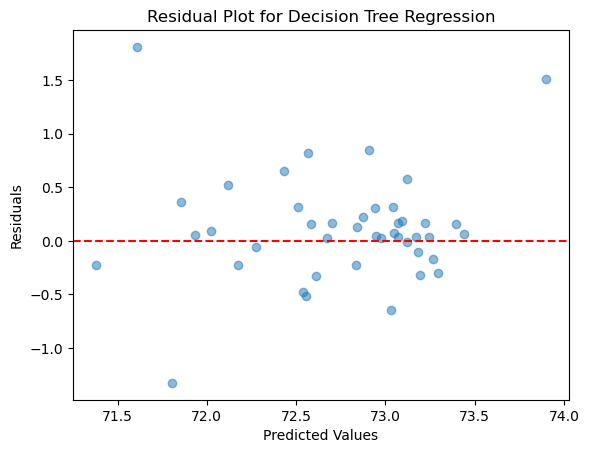

In [151]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Decision Tree Regression')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

### Classification

In [152]:
df = pd.read_csv("glass.csv")

In [153]:
df['Si'].describe()

count    214.000000
mean      72.650935
std        0.774546
min       69.810000
25%       72.280000
50%       72.790000
75%       73.087500
max       75.410000
Name: Si, dtype: float64

### Converting Numerical Feature into Categorical

In [155]:
def Tagging(sale):
    if sale>= 7.5:
        return "High"
    else:
        return "Low"

In [156]:
df['Si']=df['Si'].apply(Tagging)

In [157]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,High,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,High,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,High,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,High,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,High,0.55,8.07,0.0,0.0,1


### Encoding

In [158]:
Objectcol = df.select_dtypes(object).columns
Objectcol

Index(['Si'], dtype='object')

In [160]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(dtype=int)

df[Objectcol]=oe.fit_transform(df[Objectcol])

In [161]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,0,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,0,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,0,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,0,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,0,0.55,8.07,0.0,0.0,1


### Data Splitting

In [162]:
X = df.drop('Si',axis=1)
y = df['Si']

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (171, 9)
Shape of X_test:  (43, 9)
Shape of y_train:  (171,)
Shape of y_test: (43,)


### Model Selection - Random Forest Classifier

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rfc_model = RandomForestClassifier()

In [167]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [168]:
y_pred = rfc_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Model Evaluation

In [169]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, ConfusionMatrixDisplay

In [170]:
accuracy_score(y_test, y_pred)

1.0

In [171]:
confusion_matrix(y_test, y_pred)

array([[43]], dtype=int64)

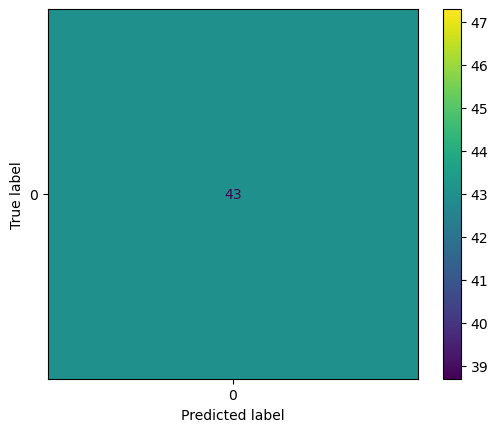

In [172]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=rfc_model.classes_).plot();

In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



### Important Attribute

In [174]:
imp_fearture = rfc_model.feature_importances_
imp_fearture

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

### GridSearchCV

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
rfc = RandomForestClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2,3],
              'max_features': ['sqrt', 0.5]}

In [178]:
grid = GridSearchCV(rfc,param_grid,scoring=scorer,cv=5,n_jobs=-1,verbose=3)

In [179]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [180]:
grid.best_estimator_

RandomForestClassifier(n_estimators=50)

In [181]:
y_pred = grid.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [182]:
accuracy_score(y_test, y_pred)

1.0

In [183]:
confusion_matrix(y_test, y_pred)

array([[43]], dtype=int64)

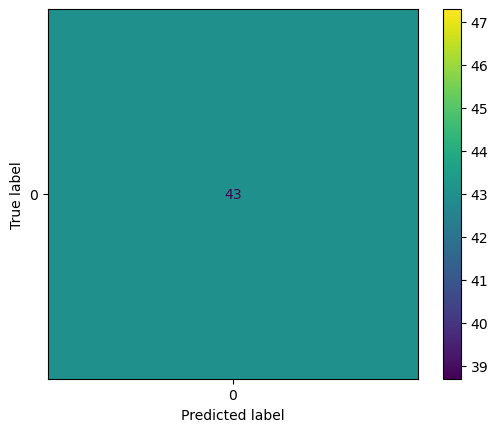

In [184]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();

In [185]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



### Retrain Model with Cross Validation

In [186]:
from sklearn.model_selection import GridSearchCV, KFold

In [188]:
# Define a parameter grid for hyperparameter search
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2,3],
              'max_features': ['sqrt', 0.5]}
# Create a KFold object
kfold = KFold(n_splits=8, random_state=42, shuffle=True)

# Define the evaluation metric (here, F1-score)
scorer = 'f1_macro'

# Create the Random Forest Classifier object
rfc2 = RandomForestClassifier()

# Perform GridSearchCV with KFold cross-validation
grid_search = GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=kfold, scoring=scorer)

# Fit the model on the data
grid_search.fit(X_train, y_train)

# Print the best parameters and cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Access the best model from the GridSearchCV object
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 1.0


### Retrain Model

In [189]:
final_rfc = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3, min_samples_split=2, n_estimators=50)

In [190]:
final_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=50)

### Model Evaluation

In [191]:
y_pred = final_rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [192]:
accuracy_score(y_test, y_pred)

1.0

In [193]:
confusion_matrix(y_test, y_pred)

array([[43]], dtype=int64)

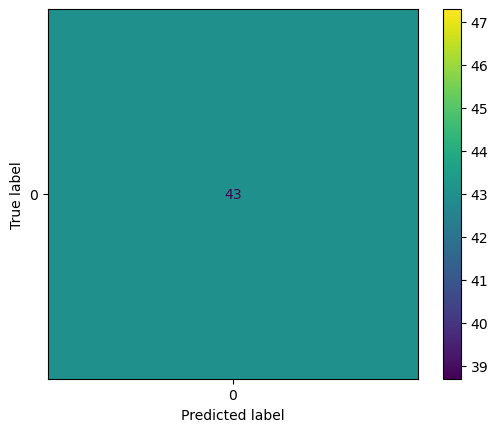

In [194]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=final_rfc.classes_).plot();

In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



# Model Deployment

In [196]:
# from joblib import dump,load

In [197]:
# dump(final_rfc, 'final_rfc.joblib')